In [98]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [99]:
germandf = pd.read_csv('german_credit.csv')
print(germandf.shape)

(1000, 21)


In [100]:
#observe some 5 random rows of this data, to get a visual-feel
#of different possible values
print(germandf.sample(n=5, random_state=5))

     default account_check_status  duration_in_month  \
544        0  no checking account                 12   
515        0               < 0 DM                  6   
193        0  no checking account                  6   
11         1               < 0 DM                 48   
279        0  no checking account                 24   

                                        credit_history              purpose  \
544  critical account/ other credits existing (not ...            car (new)   
515  critical account/ other credits existing (not ...            car (new)   
193           existing credits paid back duly till now  domestic appliances   
11            existing credits paid back duly till now             business   
279           existing credits paid back duly till now  domestic appliances   

     credit_amount              savings   present_emp_since  \
544           1255         ... < 100 DM       .. >= 7 years   
515            609         ... < 100 DM  4 <= ... < 7 years   

In [101]:
#There are no null entries
germandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [102]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [103]:
X = germandf.drop(["default"], axis=1)
y = germandf["default"]
test_size = 0.50 # taking 50:50 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [104]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [105]:
newgermandf = pd.get_dummies(germandf, columns=['account_check_status', 'credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'], drop_first=True)
print(newgermandf)

     default  duration_in_month  credit_amount  installment_as_income_perc  \
0          0                  6           1169                           4   
1          1                 48           5951                           2   
2          0                 12           2096                           2   
3          0                 42           7882                           2   
4          1                 24           4870                           3   
5          0                 36           9055                           2   
6          0                 24           2835                           3   
7          0                 36           6948                           2   
8          0                 12           3059                           2   
9          1                 30           5234                           4   
10         1                 12           1295                           3   
11         1                 48           4308                  

In [106]:
# Print Shape of model data
print(newgermandf.shape)

(1000, 49)


### Check for highly correlated variables but don't required any treatment for this use case

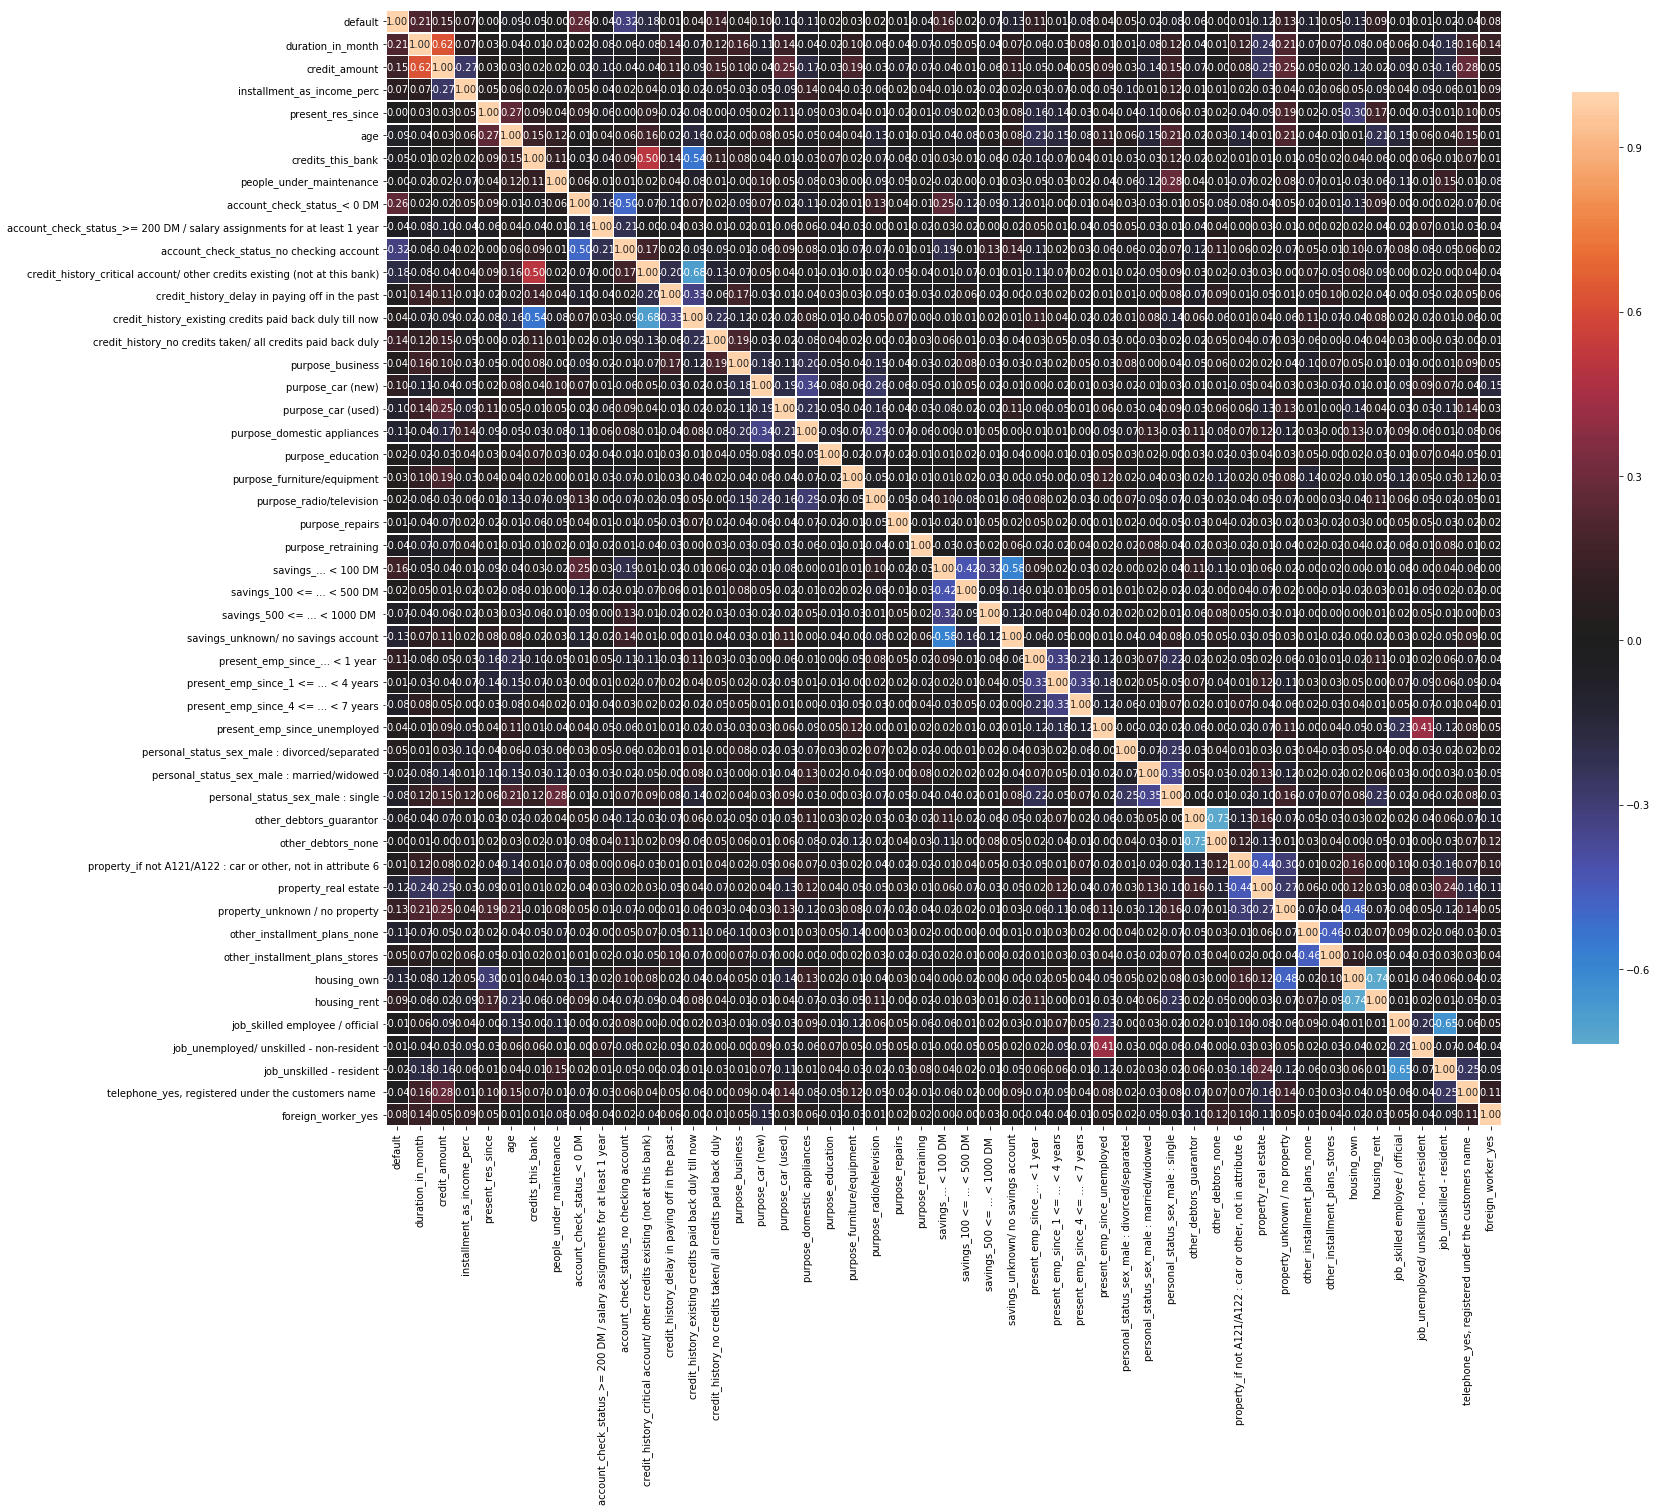

In [107]:
#Below heatmap demontrates the correlated variables
plt.figure(figsize=(25, 25))
sns.heatmap(newgermandf.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

### Drop the original variables which are converted to dummy

In [108]:
#When the get_dummies is subjected for a variable, the original variable is replaced with the dummy variables.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [109]:
X = newgermandf.drop(["default"], axis=1)
y = newgermandf["default"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [110]:
Rf_model = RandomForestClassifier(n_estimators=500,criterion="entropy",random_state=9999,n_jobs=2)
Rf_model.fit(X_train,y_train)
ypred = Rf_model.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [111]:
accuracyRF = metrics.accuracy_score(y_test,ypred)
precisionRF = metrics.precision_score(y_test,ypred)
recallRF = metrics.recall_score(y_test,ypred)
f1scoreRF = metrics.f1_score(y_test,ypred)
print("The accuracy score for Random Forest Classifier is {}".format(accuracyRF))
cm = metrics.confusion_matrix(y_test,ypred)
print("The confusion matrix is",cm)

The accuracy score for Random Forest Classifier is 0.79
The confusion matrix is [[202  15]
 [ 48  35]]


### Q6 Show the list of the features importance( 1 Marks)

In [112]:
importances = Rf_model.feature_importances_
print (pd.Series(importances,index = list(X)).sort_values(ascending=False))

credit_amount                                                                 0.116171
age                                                                           0.091958
duration_in_month                                                             0.086272
account_check_status_no checking account                                      0.056920
installment_as_income_perc                                                    0.041192
present_res_since                                                             0.039835
account_check_status_< 0 DM                                                   0.034739
other_installment_plans_none                                                  0.021859
personal_status_sex_male : single                                             0.020952
savings_... < 100 DM                                                          0.020929
credits_this_bank                                                             0.020832
credit_history_critical account/ other cred

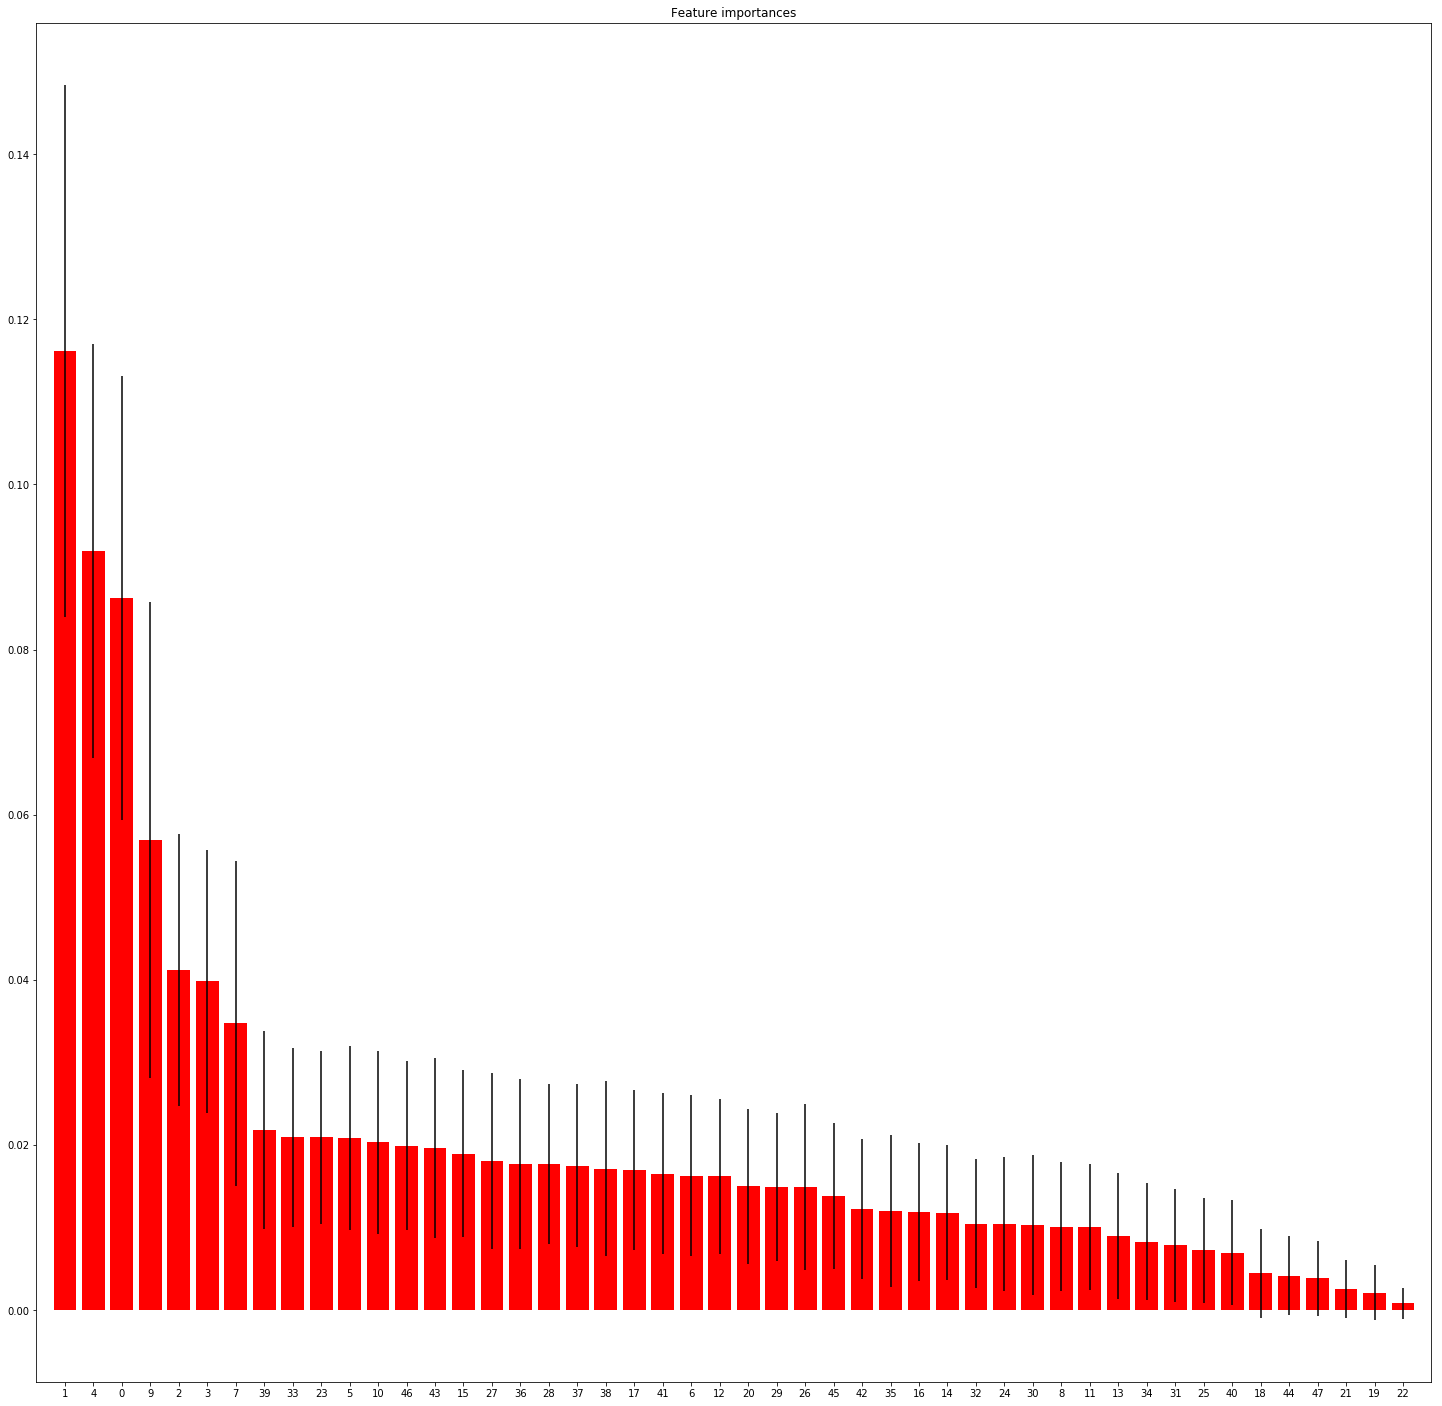

In [113]:
std = np.std([tree.feature_importances_ for tree in Rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(25, 25))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [114]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [115]:
# Use below values
num_folds = 10
seed = 77

In [116]:
#Validate the Random Forest model build above using k fold

In [117]:
arr = []
final_f1_score = 0 
kf = KFold(n_splits=num_folds, random_state = seed)
for train_index, test_index in kf.split(X):
     X_train, y_train = X.loc[train_index], y.loc[train_index]
     Rf_model.fit(X_train,y_train)
     X_test = X.loc[test_index]
     ypred = Rf_model.predict(X_test)
     y_test = y.loc[test_index]
     accuracyRF = metrics.accuracy_score(y_test,ypred)
     precisionRF = metrics.precision_score(y_test,ypred)
     recallRF = metrics.recall_score(y_test,ypred)
     f1scoreRF = metrics.f1_score(y_test,ypred)
     resultsRF = [accuracyRF, recallRF, precisionRF, f1scoreRF]
     arr.append(resultsRF)
     if(final_f1_score < f1scoreRF):
            final_f1_score = f1scoreRF
            X_train_final = X_train
            y_train_final = y_train
            X_test_final = X_test
            y_test_final = y_test
            ypred_final = ypred

In [118]:
#Calculate Mean score

In [119]:
resultsRFC = pd.DataFrame(arr, columns=["accuracy", "recall", "precision", "f1_score"])

In [120]:
print("The mean of f1 score is {}".format(np.mean(resultsRFC.f1_score)))
print("The mean of accuracy is {}".format(np.mean(resultsRFC.accuracy)))
print("The mean of precision is {}".format(np.mean(resultsRFC.precision)))
print("The mean of recall is {}".format(np.mean(resultsRFC.recall)))

The mean of f1 score is 0.5034734808757936
The mean of accuracy is 0.767
The mean of precision is 0.7208115430321312
The mean of recall is 0.40691635867606263


In [121]:
# Calculate score standard deviation using std()

In [122]:
print("The f1 score's standard deviation is {}".format(np.std(resultsRFC.f1_score)))

The f1 score's standard deviation is 0.10668213892152235


# Q8 Print the confusion matrix( 1 Marks)

In [123]:
cm = metrics.confusion_matrix(y_test_final,ypred_final)
print("The confusion matrix is",cm)

The confusion matrix is [[71  4]
 [ 9 16]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [124]:
#The below data frame represents metrics from different iterations of Kfold
print(resultsRFC)

   accuracy    recall  precision  f1_score
0      0.87  0.640000   0.800000  0.711111
1      0.67  0.250000   0.470588  0.326531
2      0.79  0.521739   0.545455  0.533333
3      0.81  0.607143   0.680000  0.641509
4      0.81  0.321429   1.000000  0.486486
5      0.68  0.268293   0.846154  0.407407
6      0.75  0.300000   0.692308  0.418605
7      0.78  0.406250   0.812500  0.541667
8      0.75  0.379310   0.611111  0.468085
9      0.76  0.375000   0.750000  0.500000


In [125]:
#The below metrics are for the best KFold selection
bestaccuracyRF = metrics.accuracy_score(y_test_final,ypred_final)
bestprecisionRF = metrics.precision_score(y_test_final,ypred_final)
bestrecallRF = metrics.recall_score(y_test_final,ypred_final)
print("The value of accuracy is {}, precision is {} and recall is {}".format(bestaccuracyRF,bestprecisionRF,bestrecallRF))

The value of accuracy is 0.87, precision is 0.8 and recall is 0.64


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [126]:
#Hint: Use roc_curve

(array([0.        , 0.05882353, 1.        ]), array([0.   , 0.375, 1.   ]), array([2, 1, 0], dtype=int64))


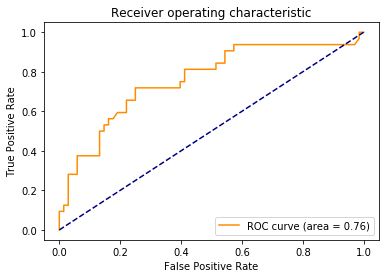

In [127]:
roc = metrics.roc_curve(y_test,ypred)
print(roc)
y_predictProb = Rf_model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predictProb[::,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [128]:
#The below is the Area Under the curve of the Receiver Operating Characteristic score
print(metrics.roc_auc_score(y_test,ypred))

0.6580882352941176


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [ ]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())